In [179]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [216]:
path = 'NewYork' + '//'
file = 'listings.csv'
df = pd.read_csv(path + file)

In [217]:
# Parsing functions used to format data types 
def parseNum(num):
    return int(num)

def parsePrices(price):
    price = price.replace('$', '')
    price = price.replace(',', '')
    #print(price)
    return int(float(price))

def countAmenities(amen):
    return len(amen)

def parseBool(val):
    if val == 't':
        return 1
    elif val == 'f':
        return 0
    
def parseDF(in_df):
    in_df['id'] = in_df['id'].apply(parseNum)
    in_df['amenities'] = in_df['amenities'].apply(countAmenities)
    in_df['calculated_host_listings_count'] = in_df['calculated_host_listings_count'].apply(parseNum)
    in_df['number_of_reviews'] = in_df['number_of_reviews'].apply(parseNum)
    in_df['host_identity_verified'] = in_df['host_identity_verified'].apply(parseBool)
    return in_df
    
def splitDF(in_df):
    in_df['price'] = in_df['price'].apply(parsePrices)
    under100 = (in_df['price'] <= 100)
    from100to200 = (in_df['price'] > 100) & (in_df['price'] <= 200)
    over200 = (in_df['price'] > 200)
    
    df1 = in_df[under100]
    df2 = in_df[from100to200]
    df3 = in_df[over200]
    
    return df1.fillna(0), df2.fillna(0), df3.fillna(0)

In [218]:
# First we split the dataframe into 3 parts an then we parse them to make them ready for regression

df1, df2, df3 = splitDF(df)
regression_rows = ['id', 'price', 'amenities', 'calculated_host_listings_count', 'number_of_reviews', 'host_identity_verified', 'review_scores_rating']


df1 = parseDF(df1)
df1 = df1[regression_rows]
df2 = parseDF(df2)
df2 = df2[regression_rows]
df3 = parseDF(df3)
df3 = df3[regression_rows]

X = df1.drop('review_scores_rating', axis=1)
y = df1['review_scores_rating']
#regression_target_1 = df1[regression_target]


11434 5717 11434 5717


Text(0.5, 1.0, 'Plot')

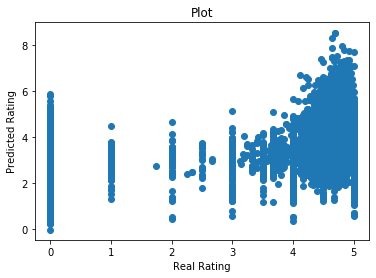

In [225]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3)
#print(x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0])
lm = linear_model.LinearRegression(normalize=True)

lm.fit(X, y)

#predictedRating = pd.DataFrame(lm.predict(X), columns=['Predicted Rating'])
#actualRating = pd.DataFrame(y, columns=['Actual Rating'])
#actualRating = actualRating.reset_index(drop=True)
#actual_vs_predicted = pd.concat([actiualRating, predictedRating], axis=1)

plt.scatter(y, lm.predict(X))
plt.xlabel('Real Rating')
plt.ylabel('Predicted Rating')
#plt.rcParams['figure.figdize'] = (10, 6)
plt.title("Plot")